In [1]:
##Binary classification in Tenserflow, API for building and training deep learning models
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
dataset = loadtxt('diabetes.csv', delimiter=',')  #dataseparated by ,
# split into input (X) and output (y) variables
X = dataset[:,0:8]    #all rows, column(features 0-7)
y = dataset[:,8]       #column idex 8 means 9th column 

In [6]:
X.shape   (m,nx)

(768, 8)

In [7]:
##1. Build the model 3 layers(layers_1 with node 12, layer_2 with node 8 and out put layer)
#creates a Sequential model object. A Sequential model is a linear stack of layers, where you can add one layer at a time.
#It's a basic and common way to build neural networks in Keras.

# layer with 12 neurons (nodes). Each neuron in this layer will be connected to every neuron in the previous layer.
#input is 8.

#choice of no. of neuron depends on complexity, data size, model interpretability etc.

model = Sequential()
model.add(Dense(12, input_shape=(8,), activation='relu'))  ##Node-12,input shape(n_x,m)
model.add(Dense(8, activation='relu'))    #2nd layer                         
model.add(Dense(1, activation='sigmoid'))    #output layer, class is 1(either 0 or 1), binary classification

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


Trainable params: This is the number of parameters that will be updated during training. It's usually the same as the "Total params" unless you've set certain layers to be non-trainable.

divide the dataset into smaller subsets called batches for training model.

None value in this context represents the batch size,batch size represents the number of samples (data points) that are processed together in each forward and backward pass during training. 

During training and inference, you can feed your model different batch sizes depending on your data

number of training examples used in each iteration (forward and backward pass) during the training process.

In [9]:
##2.Compile the model, 
#Compiling a model involves specifying several key components that determine how the model will be trained

#This loss function is appropriate when you have two classes (e.g., 0 and 1) and you want to minimize the log loss between 
#the true labels and the predicted probabilities.

#optimization, an algorithm or method that adjusts the parameters (weights and biases) of a neural network during training 
#in order to minimize a specific loss function. The goal of optimization is to find the set of model parameters that results
#in the best possible performance on a given task, such as classification or regression.

#Most optimization algorithms used in deep learning are based on gradient descent or its variations(SGD, AGA ETC)

#'accuracy', which is a common metric for classification problems. It tells you the proportion of correctly classified examples
#in the training and validation sets.

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
##3.Fit the model, fit method to train model

#Each row of X corresponds to one training example.
#y contains the correct labels for training data, and each label corresponds to a training example.

#specifies the number of times the entire training dataset will be passed forward and backward through the neural network

#model will update its parameters after processing each batch of 10 training examples.

#During each epoch, it will:
#Split the training data into mini-batches of size 10
#For each mini-batch, it will perform a forward pass to compute predictions, calculate the loss (how far off the predictions
#are from the true labels), and then perform a backward pass (backpropagation) to update the model's parameters 
#(weights and biases) using the optimizer and learning rate specified during model compilation.
#After processing all mini-batches in one epoch, it will repeat the process for the specified number of epochs

model.fit(X, y, epochs=150, batch_size=10)

Epoch 1/150
77/77 [==============================] - 2s 5ms/step - loss: 1.5268 - accuracy: 0.5286
Epoch 2/150
77/77 [==============================] - 0s 5ms/step - loss: 0.8896 - accuracy: 0.5430
Epoch 3/150
77/77 [==============================] - 0s 5ms/step - loss: 0.7588 - accuracy: 0.5690
Epoch 4/150
77/77 [==============================] - 0s 5ms/step - loss: 0.7196 - accuracy: 0.6133
Epoch 5/150
77/77 [==============================] - 0s 5ms/step - loss: 0.6646 - accuracy: 0.6224
Epoch 6/150
77/77 [==============================] - 0s 5ms/step - loss: 0.6441 - accuracy: 0.6393
Epoch 7/150
77/77 [==============================] - 0s 5ms/step - loss: 0.6361 - accuracy: 0.6419
Epoch 8/150
77/77 [==============================] - 0s 5ms/step - loss: 0.6323 - accuracy: 0.6615
Epoch 9/150
77/77 [==============================] - 0s 5ms/step - loss: 0.6160 - accuracy: 0.6693
Epoch 10/150
77/77 [==============================] - 0s 5ms/step - loss: 0.6190 - accuracy: 0.6719
Epoch 11/

Epoch 1/150
77/77 [==============================] - 0s 5ms/step - loss: 0.4424 - accuracy: 0.7917
Epoch 2/150
77/77 [==============================] - 0s 5ms/step - loss: 0.4506 - accuracy: 0.7943
Epoch 3/150
77/77 [==============================] - 0s 5ms/step - loss: 0.4511 - accuracy: 0.7878
Epoch 4/150
77/77 [==============================] - 0s 5ms/step - loss: 0.4494 - accuracy: 0.7956
Epoch 5/150
77/77 [==============================] - 0s 4ms/step - loss: 0.4476 - accuracy: 0.7969
Epoch 6/150
77/77 [==============================] - 0s 5ms/step - loss: 0.4402 - accuracy: 0.7943
Epoch 7/150
77/77 [==============================] - 0s 5ms/step - loss: 0.4550 - accuracy: 0.7865
Epoch 8/150
77/77 [==============================] - 0s 5ms/step - loss: 0.4516 - accuracy: 0.7982
Epoch 9/150
77/77 [==============================] - 0s 4ms/step - loss: 0.4448 - accuracy: 0.7969
Epoch 10/150
77/77 [==============================] - 0s 4ms/step - loss: 0.4469 - accuracy: 0.8008
Epoch 11/

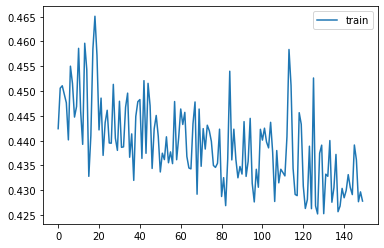

In [19]:
from matplotlib import pyplot
history_X = model.fit(X, y, epochs=150, batch_size=10) 

#contains information about the training process, including the loss and any specified metrics at each epoch.
# plots the training loss over the epochs. 
# list of loss values recorded at the end of each training epoch.

pyplot.plot(history_X.history['loss'], label='train')    #label specifies legent for plot
pyplot.legend()
pyplot.show()      #displays the plot on your screen

In [11]:
##4.evaluate the keras model

#the underscore _ is often used as a convention in Python to represent a variable that you don't intend to use or need. 
#In this case, it's used to capture the first value returned by model.evaluate(), which is typically the loss value. 
#Since you're interested in the accuracy and not the loss, you use _ to discard the loss value.

_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))    #print the accuracy

#'Accuracy: %.2f': This is a string template that includes a placeholder %f for a floating-point value with two decimal places
#(hence %.2f).
#The % operator is used to format the string. It takes the string on the left and the value(s) on the right and inserts
#the value(s) into the string

24/24 [==============================] - 1s 4ms/step - loss: 0.5002 - accuracy: 0.7591
Accuracy: 75.91


In [16]:
##5. predictions with the trained model on input x
predictions = model.predict(X)
#print(predictions)   raw prediction values
# round predictions 
predictions=(predictions> 0.5).astype(int)   #rounds the raw predictions to binary values (0 or 1)

#(predictions > 0.5): creates a Boolean array where each element is True if the corresponding prediction is greater than 0.5
#.astype(int): This part converts the Boolean values (True/False) to integers. 

print(predictions)

24/24 [==============================] - 0s 4ms/step
[[0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [

In [17]:
##iterate through 1st five examples of dataset makes predictions using your model, and prints the input
#features, model predictions, and expected (true) labels for each example
#%s is a placeholder for a string.
#%d is a placeholder for an integer.
#expected %d, placeholder for 3rd entry in output

#X[i].tolist(): This extracts the input features of the i-th example from your dataset, converts them to a list, and 
#inserts them into the format string as a string
#model's prediction for the i-th example,
#expected (true) label for the i-th example

#middle % symbol is used as a formatting operator in Python to insert values into a string.


for i in range(5):    
 print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))

[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0] => 0 (expected 1)
[1.0, 85.0, 66.0, 29.0, 0.0, 26.6, 0.351, 31.0] => 0 (expected 0)
[8.0, 183.0, 64.0, 0.0, 0.0, 23.3, 0.672, 32.0] => 1 (expected 1)
[1.0, 89.0, 66.0, 23.0, 94.0, 28.1, 0.167, 21.0] => 0 (expected 0)
[0.0, 137.0, 40.0, 35.0, 168.0, 43.1, 2.288, 33.0] => 1 (expected 1)


In [ ]:
##exercise_7
#do a ANN model in tenserflow for the data set advertisement(ISLR)


In [20]:
##Multiclass model
from keras.datasets import mnist   #28x28 pixel grayscale images of handwritten digits (0 through 9)
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()  #load dataset and assign to 4 variables

#train image---28x28 pixel grayscale images representing handwritten digits
#train label---Each label is an integer indicating the digit (0 through 9)

11490434/11490434 [==============================] - 2s 0us/step


we can train our multiclass classification model on the training data and then evaluate its performance on unseen data using the testing data.

In [22]:
print(train_images.shape)    #  3D array, number of training examples, height, and width of each image
print(train_labels.shape)     #1D array with 10,000 elements along a single dimension
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


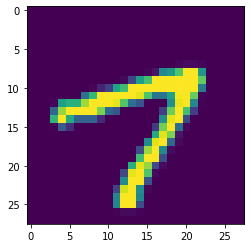

In [23]:
from matplotlib import pyplot
pyplot.imshow(train_images[101,:,:]) #pyplot module is used to display an image from the train_images array.

#selecting the 101st image from the array.pyplot.imshow(...): This function is used to display an image.

#This can be helpful for visualizing the data and verifying that it's loaded correctly before using it for training or 
#other purposes.

In [24]:
print(train_labels)    #NumPy array that contains the labels for each of the training examples.(0-9)
print(test_labels)

[5 0 4 ... 5 6 8]
[7 2 1 ... 4 5 6]


In [25]:
from keras import models
from keras import layers

#With these two modules imported, you can start building neural network models using Keras

In [26]:
##1.Build Model
# In Keras, a sequential model is a linear stack of layers where you can add one layer at a time. 
#It's a common choice for feedforward neural networks.

##512 is common choice for image classification, to capture relevant features from the 28x28 pixel images effectively. but not fixed

#28*28,), which means the layer expects each input data in the shape of flattened 28x28 pixel images. 
#The , after (28*28,) is used to indicate that it's a tuple with one element.

#When working with neural networks, it's common to flatten these images into a one-dimensional vector, where each pixel's 
#intensity value becomes an element of the vector. So, a flattened 28x28 image results in 28x28 = 784 elements in the vector.
#note intensity value is (0-255)

#Since this is a classification task (recognizing digits), you typically have one neuron per class (digit). 
#So, there are 10 neurons in the output layer, each representing the probability of a particular digit.

network=models.Sequential()   # initializes a sequential model
network.add(layers.Dense(512,activation="relu",input_shape=(28*28,)))   
network.add(layers.Dense(10,activation="softmax"))    #output layer, multiclass classification tasks so used softmax

In [27]:
#get an overview of your model's architecture and the number of parameters it contains.

network.summary()   #specifies, layer, output shape (none bcoz batch size of any no can be taken), para in each layer(w,b) 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 dense_4 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [28]:
#512*(28*28)+512

In [29]:
##2.Compile the model

# there is no one-size-fits-all answer, and the choice of optimizer can vary from project to project. Therefore, it's a good 
#idea to experiment with different optimizers and other hyperparameters to find the best combination for your particular task.

#loss function quantifies how well the model's predictions match the true labels during training.'categorical_crossentropy' 
#is a commonly used loss function for multiclass classification tasks, where the target labelsare one-hot encoded

#'accuracy' metric measures the fraction of correctly classified examples 

network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
    RMSprop (Root Mean Square Propagation):
        RMSprop adapts the learning rate for each parameter during training. It divides the learning rate by an exponentially moving average of the squared gradients.
        It is well-suited for training recurrent neural networks (RNNs) and models with sparse gradients.
        It is generally a stable and effective optimizer, often used as a go-to choice.

    Adam (Adaptive Moment Estimation):
        Adam combines ideas from RMSprop and momentum optimization. It maintains moving averages of both the gradients and the squared gradients.
        It adapts the learning rate for each parameter and has momentum-like behavior to help the optimizer converge faster.
        Adam is widely used and often works well for various deep learning tasks.

In [30]:
##3. prepocesssing of image data to make suitable format for feeding into a neural network
#Flattening and normalizing the images

#many NN require input data to be in a flat vector format.
train_images=train_images.reshape((60000,28*28)) #flattens original 28x28 pixel format, into a vector of 784 elements
train_images=train_images.astype('float32')/255   #normalization, convert to float and divide by 255

test_images=test_images.reshape((10000,28*28))
test_images=test_images.astype('float32')/255

After reshaping, this line converts the pixel values of the training images to floating-point numbers (float32) and scales them by dividing each pixel value by 255. Scaling pixel values to the range [0, 1] is a common practice in image processing and deep learning because it helps the model converge faster during training. This is often referred to as normalization.

In [31]:
print((train_images.shape))
print((test_images.shape))

#60,000 training examples, each represented as a flat vector of 784 elements.

(60000, 784)
(10000, 784)


In [32]:
##preprocessing the labels data before training a neural network using one-hot encoding.

from tensorflow.keras.utils import to_categorical  #to_categorical function is used to convert integer labels into one-hot encoded vectors.
train_labels=to_categorical(train_labels) #applies one-hot encoding to the training labels. 

#For example, a label of 3 becomes [0, 0, 0, 1, 0, 0, 0, 0, 0, 0].

test_labels=to_categorical(test_labels)

The purpose of this one-hot encoding is to represent categorical labels in a format that can be easily processed by neural networks, particularly for multi-class classification tasks

In [33]:
train_labels[:,3]

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [34]:
print(train_labels.shape)       #(num_samples, num_classes)
print(train_images.shape)      #(num_samples, height, width, num_channels(if color image)).

(60000, 10)
(60000, 784)


In [35]:
##4.Fit the model
#model will see the entire training dataset five times during training.
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 11s 19ms/step - loss: 0.2555 - accuracy: 0.9265
Epoch 2/5
469/469 [==============================] - 9s 19ms/step - loss: 0.1044 - accuracy: 0.9690
Epoch 3/5
469/469 [==============================] - 9s 18ms/step - loss: 0.0686 - accuracy: 0.9792
Epoch 4/5
469/469 [==============================] - 8s 18ms/step - loss: 0.0493 - accuracy: 0.9850
Epoch 5/5
469/469 [==============================] - 9s 18ms/step - loss: 0.0371 - accuracy: 0.9886


Epoch 1/5
469/469 [==============================] - 9s 20ms/step - loss: 0.0076 - accuracy: 0.9981
Epoch 2/5
469/469 [==============================] - 9s 19ms/step - loss: 0.0060 - accuracy: 0.9983
Epoch 3/5
469/469 [==============================] - 9s 19ms/step - loss: 0.0046 - accuracy: 0.9986
Epoch 4/5
469/469 [==============================] - 8s 18ms/step - loss: 0.0039 - accuracy: 0.9990
Epoch 5/5
469/469 [==============================] - 9s 19ms/step - loss: 0.0029 - accuracy: 0.9991


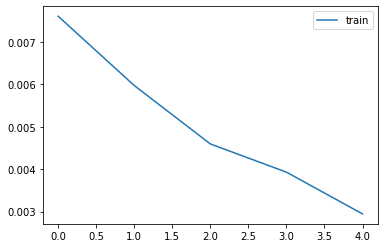

In [38]:
history_X=network.fit(train_images, train_labels, epochs=5, batch_size=128)
pyplot.plot(history_X.history['loss'], label='train')
pyplot.legend()
pyplot.show()

In [36]:
##5.evaluate the keras model
test_loss,test_accurcy=network.evaluate(test_images,test_labels)
print('test_loss: ' + str(test_loss))
print('test_acc: ' + str(test_accurcy))

313/313 [==============================] - 2s 6ms/step - loss: 0.0688 - accuracy: 0.9783
test_loss: 0.06882532685995102
test_acc: 0.9782999753952026


In [ ]:
#exercise fashion dataset